# Final Project - Metaphor Use and Meanings in US Political Discourse

### Yuehan Hailey Liu

## 1. Introduction

Metaphor is a central phenomenon of language, and is prevalent in nearly all kinds of contexts and registers, including political discourse. In the field of cognitive linguistics, Conceptual Metaphor (CM) is considered to be operating at the level of thinking, in other words, understanding and experiencing one kind of thing in terms of another. Metaphor links a source domain (concrete, directly experienced entities, attributes, processes and relationships) and a target domain (abstract concepts requiring structures from source domain) together through connections referred to as ‘mapping’ (Lakoff & Johnson, 1980; Lakoff, 1993).

This study aims to investigate metaphor distribution, usage, and meanings in US political texts. In order to achieve this, a theme-specific, semantically annotated metaphor corpus is used in this project (http://purl.org/net/metaphor-corpus). Different from previous work which focus mainly on mapping linguistic metaphors to their conceptual source and target domain, this current dataset contains 1771 metaphor annotations of ontological categories with associated schema representations. A total of 14 ontological categories abstracted over 70 source domains were detected from the metaphorical expressions being identified. The textual data of this corpus is drawn primarily from web searches targeting particular source-target pairs, with controlled target concepts pertaining to the areas of governance (e.g., Democracy, Elections), economic inequality (e.g., Taxation, Wealth), and the US debate on gun control (e.g., Gun Rights, Control of Guns).

## 2. Cultural Pattern and Sign Relations 

#### Metaphor as Cultural Sign

Under the context of this project, the cultural pattern being studied is the metaphorical pattern in political conversation. The definition of "culture" being discussed here has basically two layers: linguistic and conceptual. First, it refers to the usage and properties of the linguistic representation of metaphorical expressions. Secondly, since further abstraction over the linguistic metaphor instances can be made, the notion "concept" also denotes people's understanding and interpretation of the issues conveyed by the metaphors on a conceptual level.

Widely acknowledged in the field of cognitive linguistics, George Lakoff and Mark Johnson’s cognitive semantic approach to metaphor contends that “the human conceptual system is metaphorically structured and defined” (Lakoff and Johnson, 1980, p. 6). In other words, metaphor as a cultural sign is highly conventionalized because as an outcome of conceptual activity, it is used paradigmatically, systematically, and structurally within cultural communities. To be specific, people do not need extra information or facilitation to decode and understand the messages carried by metaphors. In some cases, certain metaphors are so conventionalized that people are using them subconsciously, without realizing that they are actually employing metaphorical techniques in their expression and conceptualization (this is also referred to as metaphor death).

Particularly noteworthy is the attribute of conceptual metaphor being used unconsciously (Lakoff and Turner, 1989). This draws special attention to the significance of metaphor analysis in journalistic writing since media coverage and representations occupy a growing influence in public discourse by driving, mirroring and perpetuating concepts, opinions and ideologies (Castells, 2009). This is particularly notable under the context of political discourse.

#### Sign Relations of Metaphor

Although few instances of the use of the term "metaphor" have been found in Peirce's writing,there are still traces indicating that Peirce considers metaphors to be iconic (Anderson, 1984). In his argument, metaphors reflect the representative character of a representamen by representing a parallelism in something else. Moreover, metaphor is distinguished from analogy by its thirdness insofar as there is "one quality mediating between two others". Therefore, from Peirce's perspective, metaphor is not diagrammatic like analogy in the sense that metaphor does not clearly show an isomorphism between the qualities of the one entity and the qualities of the other. Instead, its iconicity lies in neither of its two constituents, but in the unity of the two and a similarity they have constructed. Therefore, from a Peircean view, although metaphors may be both indexical and symbolic, these functions are overshadowed by its predominant iconicity. 

However, in my opinion, each conceptual source-target mappping in each schema is considered a dicent indexical/symbolic legisign, since there are certain human-established similarity features (semantic, syntactic, and contextual) in place that are governing the definition and usage of each conceptual metaphor. Furthermore, the similarity between the two domains in metaphor mapping is not achieved by virtue of physical resemblence, but a mental construction and representation of conventionalized association or entailment, whether arbitrary or not. In this way, each occurance of metaphor in particular context is a replica of the legisign it belongs, these sinsigns constitute the scope of each legisign and possibily exapnd it overtime. 

Specifically, in my opinion, the object of metaphor legisign is the item or concept as well as the relationship mapping between source and target domain that the metaphor is denoting; the sign-vehicle is the linguistic manifestation of the literal words of the metaphor; and the interpretant is possibly the conceptualization or association achieved by the metaphor, and the contextual and cultural connotations being conveyed.


## 3. Data Analysis 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
import gensim
from gensim.models import Word2Vec
from gensim.models.keyedvectors import KeyedVectors
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
sample = pd.read_csv('metaphor-corpus.csv',encoding= 'unicode-escape')
sample = sample.drop(sample.columns[[11, 12]], axis=1)

sample.head()

,Sentence,Schema,Schema Slot,Slot Value,Pattern,Lexical Trigger,Target LM,Target CM,Source LM,Source CM,Sentence ID
0,"I will be out in the city today, feeling the v...",01 Health and Safety,Beneficial,democracy,circulation of [beneficial],circulation of,democracy,Democracy,circulation,Blood Stream,155764
1,Shutting off the supply of guns to criminals m...,01 Health and Safety,Beneficial,guns,circulation of [beneficial],circulation of,guns,Guns,circulation,Blood Stream,NaN
2,They forget what can happen when they allow th...,01 Health and Safety,Beneficial,firearms,NaN,flow,firearms,Guns,flow,Body of Water/Movement,2376948
3,In fact there was quite a steady flow of illeg...,01 Health and Safety,Beneficial,guns,NaN,flow,guns,Guns,flow,Body of Water/Movement,2668576
4,Most experts believe that increased criminal p...,01 Health and Safety,Beneficial,guns,NaN,flow,guns,Guns,flow,Body of Water/Movement,2837550


In [3]:
sample.describe()

,Sentence,Schema,Schema Slot,Slot Value,Pattern,Lexical Trigger,Target LM,Target CM,Source LM,Source CM,Sentence ID
count,1769,1770,1770,1770,292,1750,1770,1770,1769,1770,1684
unique,1428,21,78,331,259,597,209,17,555,138,1356
top,He continuously attacks the Constitution in th...,03 Conflict,Threatened,gun control,fighting [side],fight,gun control,Control of Guns,fight,Struggle,2294245
freq,3,482,165,189,4,52,228,292,55,139,3


03 Conflict                                 482
01 Health and Safety                        429
06 Morality and Justice                     146
02 Journey                                  132
05 Engineering and Business: Engineering    111
04 Power and Control: God                    82
12 High and Low                              68
05 Engineering and Business: Resource        57
05 Engineering and Business: Business        51
04 Power and Control: Human                  43
10 Human Life Cycle and Family Relations     32
13 Nature: Body of Water                     22
07 Systematic Explanations                   19
14 Embodied Experience: Clothing             18
14 Embodied Experience: Human Body           16
11 Darkness and Light                        16
08 Plants                                    12
09 Animals                                   11
13 Nature: Weather                            8
14 Embodied Experience: Temperature           8
13 Nature: Fire                         

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, '03 Conflict'),
  Text(1, 0, '01 Health and Safety'),
  Text(2, 0, '06 Morality and Justice'),
  Text(3, 0, '02 Journey'),
  Text(4, 0, '05 Engineering and Business: Engineering'),
  Text(5, 0, '04 Power and Control: God'),
  Text(6, 0, '12 High and Low'),
  Text(7, 0, '05 Engineering and Business: Resource'),
  Text(8, 0, '05 Engineering and Business: Business'),
  Text(9, 0, '04 Power and Control: Human'),
  Text(10, 0, '10 Human Life Cycle and Family Relations'),
  Text(11, 0, '13 Nature: Body of Water'),
  Text(12, 0, '07 Systematic Explanations'),
  Text(13, 0, '14 Embodied Experience: Clothing'),
  Text(14, 0, '14 Embodied Experience: Human Body'),
  Text(15, 0, '11 Darkness and Light'),
  Text(16, 0, '08 Plants'),
  Text(17, 0, '09 Animals'),
  Text(18, 0, '13 Nature: Weather'),
  Text(19, 0, '14 Embodied Experience: Temperature'),
  Text(20, 0, '13 Nature: Fire')])

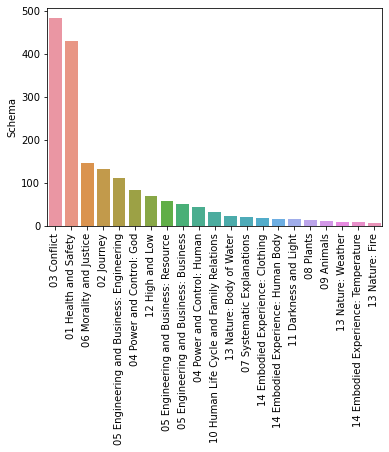

In [4]:
#### Schema Distribution

x = sample['Schema'].value_counts()
print(x)
sns.barplot(x.index,x)
plt.xticks(rotation = 'vertical')

In [5]:
sample['Target CM'].value_counts()

Control of Guns           292
Democracy                 257
Guns                      213
Poverty                   201
Taxation                  162
Gun Rights                148
Government                147
Wealth                    137
Elections                 117
Bureaucracy                67
Bureaucracy/Government     12
Democracy/Government        5
Taxes                       3
Taxpayers                   3
Money                       2
Guns/Control of Guns        2
Gun Ownership               2
Name: Target CM, dtype: int64

In [6]:
sample['Source CM'].value_counts()

Struggle                             139
Physical Harm                        101
War                                   89
A God                                 82
Struggle/War                          82
                                    ... 
Animal/Plant/Science                   1
Forceful Extraction/Resource           1
Disease/Movement                       1
Game/War                               1
Physical Location/Upward Movement      1
Name: Source CM, Length: 138, dtype: int64

Text(0.5, 1.0, 'Sentiment Polarity Distribution of Sentences')

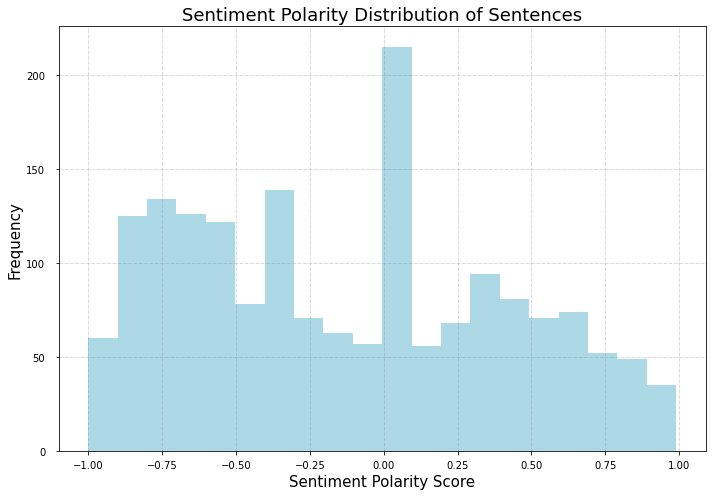

In [3]:
#### Sentiment Polarity Score Distribution

new = sample['Sentence']

sid = SentimentIntensityAnalyzer()
def sentiment_score(text):
    return sid.polarity_scores(text)['compound']

list = []
for i in range(len(new)):
    if i < len(new):
        list.append(sentiment_score(str(new[i])))
    else:
        print(list)

fig, axs = plt.subplots(1, 1, figsize =(10, 7), tight_layout = True)

axs.xaxis.set_tick_params(pad = 5)
axs.yaxis.set_tick_params(pad = 10)

axs.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.6)

N, bins, patches = axs.hist(list, color = 'lightblue', bins = 20)
    
plt.xlabel('Sentiment Polarity Score', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.title('Sentiment Polarity Distribution of Sentences', fontsize = 18)

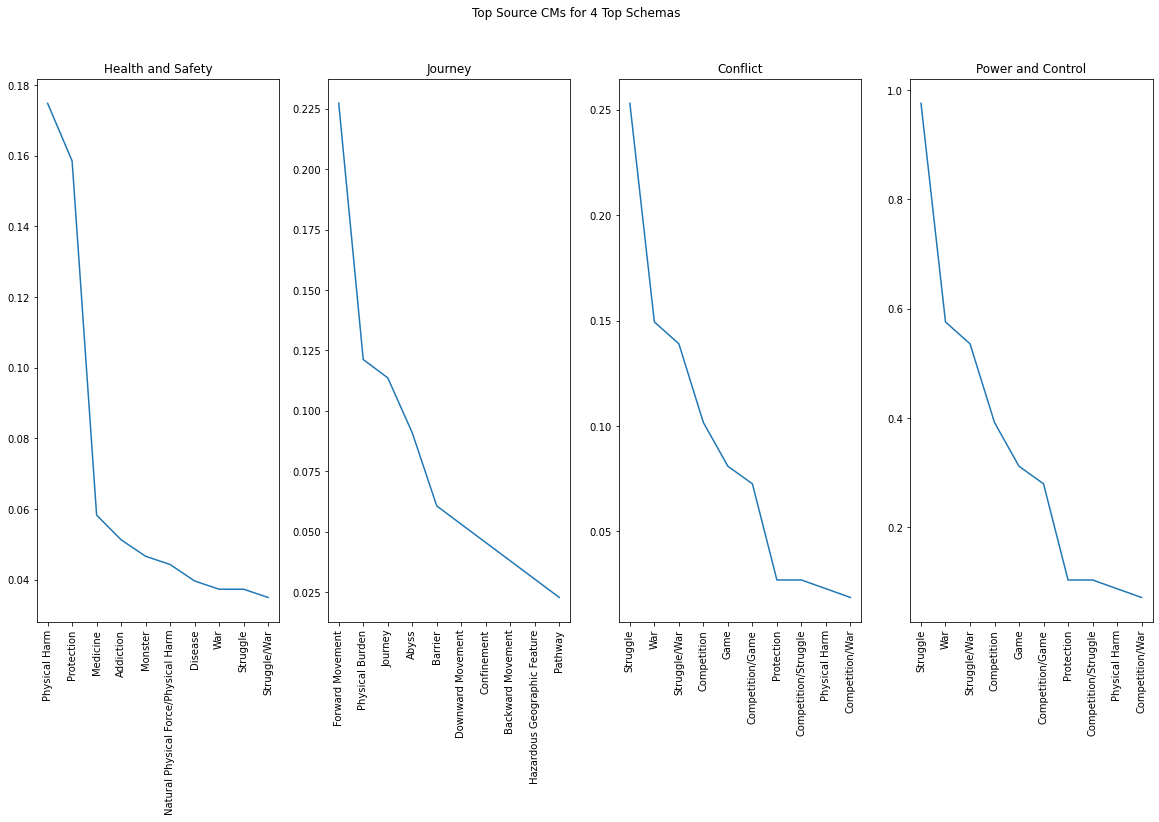

In [7]:
#### Frequency line plots of top 4 schemas

list1 = [sample[sample['Schema'] == '01 Health and Safety']['Source CM']]
list1[0]
dafr1 = pd.DataFrame(list1)
dafrN1 = dafr1.transpose()['Source CM'].value_counts()
dafr1Top10 = dafrN1.head(10)
for i in range(10):
    dafr1Top10.iloc[[i]] = dafr1Top10.iloc[[i]]/429

list2 = [sample[sample['Schema'] == '02 Journey']['Source CM']]
list2[0]
dafr2 = pd.DataFrame(list2)
dafrN2 = dafr2.transpose()['Source CM'].value_counts()
dafr2Top10 = dafrN2.head(10)
for i in range(10):
    dafr2Top10.iloc[[i]] = dafr2Top10.iloc[[i]]/132
    
list3 = [sample[sample['Schema'] == '03 Conflict']['Source CM']]
list3[0]
dafr3 = pd.DataFrame(list3)
dafrN3 = dafr3.transpose()['Source CM'].value_counts()
dafr3Top10 = dafrN3.head(10)
for i in range(10):
    dafr3Top10.iloc[[i]] = dafr3Top10.iloc[[i]]/482
    
list4 = [sample[sample['Schema'] == '04 Power and Control: God']['Source CM']] + [sample[sample['Schema'] == '04 Power and Control: Human']['Source CM']]
list4[0]
dafr4 = pd.DataFrame(list4)
dafrN4 = dafr3.transpose()['Source CM'].value_counts()
dafr4Top10 = dafrN4.head(10)
for i in range(10):
    dafr4Top10.iloc[[i]] = dafr4Top10.iloc[[i]]/125

plt.figure(figsize=(20, 10))

plt.subplot(141)
plt.plot(dafr1Top10)
plt.title('Health and Safety')
plt.xticks(rotation = 'vertical')
plt.subplot(142)
plt.plot(dafr2Top10)
plt.title('Journey')
plt.xticks(rotation = 'vertical')
plt.subplot(143)
plt.plot(dafr3Top10)
plt.title('Conflict')
plt.xticks(rotation = 'vertical')
plt.subplot(144)
plt.plot(dafr4Top10)
plt.title('Power and Control')
plt.xticks(rotation = 'vertical')
plt.suptitle('Top Source CMs for 4 Top Schemas')

plt.show()

In [10]:
#### Topic modeling of original sentences
sentences = sample['Sentence']

vect = TfidfVectorizer(min_df=50, stop_words='english')
 
X = vect.fit_transform(sentences.values.astype('U'))

model = NMF(n_components=10, random_state=5)
model.fit(X)

nmf_features = model.transform(X)
nmf_features

/opt/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)


array([[0.        , 0.26762405, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00049642, 0.00229845, 0.00460873, ..., 0.00679006, 0.00318909,
        0.00707281],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [11]:
components_df = pd.DataFrame(model.components_, columns=vect.get_feature_names())
components_df

,control,democracy,don,election,fight,fighting,government,gun,guns,just,...,protect,right,rights,said,state,tax,taxation,time,wealth,world
0,2.792551,0.000000,0.072059,0.000000,0.191556,0.176209,0.000000,2.921497,0.000000,0.059361,...,0.003213,0.000000,0.000000,0.083764,0.089098,0.000000,0.000000,0.078658,0.000000,0.042639
1,0.000000,3.726627,0.046425,0.000000,0.007706,0.000000,0.000000,0.000000,0.000000,0.034255,...,0.073746,0.024321,0.013065,0.047438,0.011052,0.000000,0.000000,0.065803,0.000000,0.123628
2,0.000000,0.000000,0.010737,0.000000,0.254951,0.131660,0.000000,0.000000,0.000000,0.070465,...,0.000000,0.000000,0.012573,0.132315,0.043113,0.000000,0.000000,0.073819,0.000000,0.196793
3,0.012141,0.000000,0.000651,0.000000,0.000000,0.000000,2.943224,0.000000,0.000000,0.000000,...,0.027731,0.027503,0.000000,0.035246,0.085858,0.000000,0.000000,0.008904,0.000000,0.007236
4,0.000000,0.000000,0.013398,0.000000,0.010187,0.000000,0.000000,0.109209,3.145289,0.199924,...,0.113009,0.200779,0.000000,0.000000,0.000000,0.000000,0.000000,0.045602,0.000000,0.017322
5,0.000000,0.000000,0.129158,0.000000,0.034119,0.002686,0.000000,2.355374,0.000000,0.092020,...,0.231760,0.217403,2.696949,0.007438,0.124908,0.000000,0.000000,0.075940,0.000000,0.000000
6,0.000000,0.000000,0.024204,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.042132,...,0.045427,0.031080,0.022208,0.000000,0.014028,0.000000,0.122211,0.005785,3.277606,0.020609
7,0.000000,0.000000,0.012842,2.873475,0.015478,0.155560,0.000000,0.000000,0.000000,0.059286,...,0.013471,0.070548,0.000000,0.095534,0.108054,0.000000,0.000000,0.104566,0.000000,0.054888
8,0.000000,0.000000,0.000000,0.000000,0.012473,0.022772,0.000000,0.000000,0.000000,0.029267,...,0.000000,0.054965,0.000000,0.079347,0.066049,2.690101,0.600988,0.043343,0.000000,0.102264
9,0.000000,0.000000,0.164955,0.000000,0.102270,0.000000,0.000000,0.000000,0.000000,0.054566,...,0.028458,0.038486,0.000000,0.125775,0.014962,0.000000,0.320110,0.114283,0.000000,0.027608


In [12]:
for topic in range(components_df.shape[0]):
    tmp = components_df.iloc[topic]
    print(f'For topic {topic+1} the words with the highest value are:')
    print(tmp.nlargest(10))
    print('\n')

For topic 1 the words with the highest value are:
gun         2.921497
control     2.792551
fight       0.191556
fighting    0.176209
state       0.089098
said        0.083764
time        0.078658
don         0.072059
new         0.064850
just        0.059361
Name: 0, dtype: float64


For topic 2 the words with the highest value are:
democracy    3.726627
world        0.123628
protect      0.073746
time         0.065803
like         0.056736
said         0.047438
don          0.046425
money        0.044989
just         0.034255
right        0.024321
Name: 1, dtype: float64


For topic 3 the words with the highest value are:
poverty     3.809331
fight       0.254951
world       0.196793
said        0.132315
fighting    0.131660
new         0.118078
time        0.073819
just        0.070465
money       0.059421
state       0.043113
Name: 2, dtype: float64


For topic 4 the words with the highest value are:
government    2.943224
money         0.086244
state         0.085858
new          

In [79]:
#### Word2Vec model plotting all source and target domains

sample['mapping']= sample['Source CM']+ " " + sample['Target CM']

df1 = sample[['Target CM', 'Source CM']]
df2 = df1.apply(lambda x: ','.join(x.astype(str)), axis=1)
df_clean = pd.DataFrame({'clean': df2})
sent = [row.split(',') for row in df_clean['clean']]
sent[:5]

[['Democracy', 'Blood Stream'],
 ['Guns', 'Blood Stream'],
 ['Guns', 'Body of Water/Movement'],
 ['Guns', 'Body of Water/Movement'],
 ['Guns', 'Body of Water/Movement']]

In [80]:
model = Word2Vec(sent, min_count=1,size= 50,workers=3, window =3, sg = 1)
model['Wealth', 'Vehicle']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


array([[ 0.00505158,  0.00156275,  0.00710083,  0.00189203,  0.00822381,
        -0.01055528,  0.00813415, -0.00867585,  0.00637436, -0.0048514 ,
         0.00433901, -0.00924016,  0.00979423, -0.00852983, -0.0066607 ,
         0.00948743,  0.00451871,  0.00641604, -0.00426616, -0.00019164,
         0.00013501, -0.00401466, -0.00077269,  0.00326163,  0.00426098,
        -0.00402087,  0.00244229, -0.00754049, -0.00292759, -0.00764856,
        -0.00209489,  0.00779934,  0.00801642,  0.00217836, -0.0058055 ,
         0.0002457 , -0.00807885, -0.00877377,  0.00100723, -0.00102057,
         0.00260439, -0.00897663,  0.00466582,  0.01251863,  0.00764881,
        -0.00223075,  0.00933462,  0.00143933, -0.0006403 , -0.00366936],
       [-0.00723857,  0.00548047,  0.00585781,  0.00382395, -0.00900447,
        -0.00647694, -0.00984367,  0.00188042, -0.00404621,  0.00499736,
        -0.00425711,  0.00452158,  0.00506121, -0.00560912,  0.00766802,
         0.0047667 , -0.00941497,  0.00247747, -0.

In [81]:
def tsne_plot(model):
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


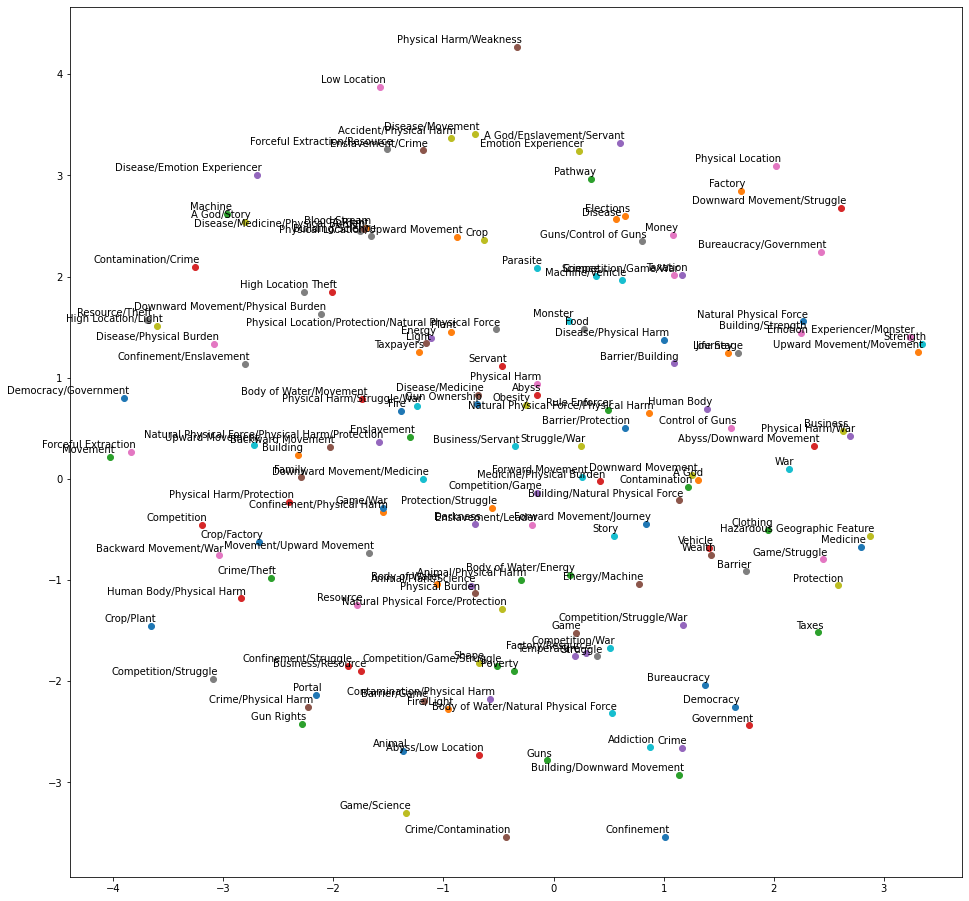

In [82]:
tsne_plot(model)

## 4. Interpretation and Discussion 

#### Descriptive analysis

To start our investigation of metaphorical pattern in US political discourse, a preliminary descriptive analysis was performed on the Schema, Source, and Target CM variables of the dataset. The frequency barplot of schema suggests that the dataset has a disproportionate distribution of ontological categories. The content and distribution of the Target CM reflect the actual topics and ideas being discussed in the texts, which are closely aligned with the contemporary political issues. A majority of these topics are Gun and Democracy related, problems like Poverty, Taxation and Election are also the predominant concentrations of this corpus. Shifting to the counts of the Source CM, the data indicate that there are more ramifications and diversity in its categorization. Notions of Struggle, Physical Harm, War and God seem to be utilized most frequently and intensively in the conceptualization, verbalization, and comprehension of political affairs.

#### Sentiment polarity analysis

Inspired by DeWall et al. (2011)'s analysis of psychological traits and emotions conveyed by linguistic markers in song lyrics to reflect the changes in US culture, a sentiment analysis is carried out in this study to delineate the emotional scale in US political discourse. As illustrated in the sentiment polarity distribution plot of the sentences, a peak of sentiment polarity score is observed at approximately 0.00, which represents a neutral tone in political expressions. In addition, there also seem to be two clusters towards the two extremes of negative (-1.0) and positive (1.0) on the sentiment scale, showing polarized results. Negative sentiments are more prominent in this case, since evident in previous descriptive outcomes, topics being discussed here are overwhelmingly serious political issues involving gun, poverty, taxation and so on. In some ways, sentiment of a text can encode its semantic relevancy. And in line with DeWall et al. (2011)'s finding, as a type of cultural product, metaphors offer theoretically meaningful information about crosscultural, within-cultural, and within-person differences in people's conceptualization of distinct topics, providing both psychological and cultural insights of people's mental processing and configuration.

#### Source domain distribution by schema

Zooming in to the different conceptualizations of a variety of topics in political discourse, I proceeded to select the top four most frequently invoked ontological categories (Health and Safety, Journey, Conflict, Power and Control) to inspect the semantic patterns of the source domains being used within each schema. The percentage frequency of the top ten most regularly adopted source domains in each schema was calculated and presented in line plot. These four distributions follow similar pattern of a high concentration on a few source domains, and a steep drop of percentage frequency as it disseminates to other source domains. Taking a closer look into the x-axis, semantic affiliation and similarity can be found both within and across schemas. Each ontological category has several distinctive source domains closely related to it, for example, "Medicine", "Addiction", and "Disease" in "Health and Safety", or "Forward Movement", "Abyss", and "Barrier" in "Journey". Despite such distinctive domain words characteristic to one particular schema, homogeneity in source domain use across top schemas can also be detected. To be specific, source domains like Struggle, Physical Harm, and War can be found in several different ontological categories, rendering these conceptual and semantic features prevalent in current day American political discourse. Basically, from the above analysis, American people seem to be understanding and discribing political issues as "a struggling war that could cause you physical harm".

This result is consistent with previous study on metaphor use in American political discourse. According to Howe (1988), the metaphors emploied in contemporary American political discourse draw heavily and systematically from the terminology of physical activity (e.g. sports) and warfare. These sources provide metaphors for use in both campaign rhetoric and the jargon of political professionals. These metaphors and the conceptual frameworks they imply are deeply rooted in American culture. Such metaphors may also have the effect of excluding women from participating in the dominant discourse of politics and thus from achieving political power. 

#### Topic modeling and Word2Vec model

To further explore the metaphorical mapping pattern and how different source and target domains relate to one another semantically and conceptually, a topic modeling analysis and a Word2Vec model were applied to the textual data. For the topic modeling analysis for the original sentences, top words and punctuations were first removed from the original sentences, and then, a TFIDF vectorizer was used to transform words in sentences into vectors. Ten topics were generated based on the feature similarity of word vectors. There are some overlap in the words of the highest weighted value in each topic, but generally speaking, the content of each topic has demonstrated different facets of political topics in the US. However, this type of analysis cannot show explicitly the relationships between source and target domains, and cannot filter out words that are used literally instead of metaphorically.

Due to this reason, I have extracted the Source and Target CM variables for the Word2Vec model to reveal the source-target domain mapping pattern. The Lakovian theory receives metaphor as a comparison and systematic mapping between two different entities, which evokes the understanding of a new target domain in terms of an old cognitive experience (Schäffner, 2005; Clinton, 2004). Therefore, such domain mapping is extremely vital in dissecting the meaning construction of metaphor and the conceptual relationship it triggers. All unique lemmas appeared in the Source and Target CM columns are vectorized using the gensim Word2Vec model, and subsequently plotted in a vector space with their text labels. In t-SNE visualization, domains that are recognized to be semantically or contextually similar are placed closer in this two-dimensional matrix, and several spectral clusters can be identified in this matrix. Evident in this vector space representation, some source-target domain words in the corpus are close to each other in the matrix, while other pairs are far. For the first type of mappings, the close proximity of the Vehicle - Wealth domain mapping is a good example. These two domains seem to have no apparent semantic relation, however, in American political discource, wealth tends to be conceptualized as a vehicle or engine that drives people to their destination. Such conceptual adjacency requires a deeper dive into the dataset to provide more context of this linguistic phenomenon. There are also source-target pairs that are intuitively similar to each other, for example, Human Body/Physical Harm and Crime/Theft. The second type of source-target mappings appear to be located dispersedly. To name a few, War and Elections, Game and Guns and so on. This points to the lack of context and limitation of size in the training set of the model, which could be improved in future studies. Also, the fine division of domain categories might also have an effect on the distribution of word vectors in the matrix. To be specific, the domain of Energy is far from Energy/Machine in the vector space, showing the potential sematic impact the word "Machine" might have imposed on the evaluation of word association.


## 5. Conclusions 

According to Patterson (2014), culture is defined as the conjugate product of two reciprocal, componential processes. The first can be summarized as the process and production of shared human knowledge and behavior. In this case, the linguistic and conceptual framework and activity of metaphor. The second is the pragmatic component of culture, which embodies the practical knowledge structure in the functioning of society. Under this context, the political and socio-cultural connotation of metaphorical use and meaning within online discourse. The results of this study can be found to mediate between these two componential processes, revealing the cultural patterns and political implications of linguistic and conceptual metaphors.

From previous investigation, a disproportionate distributino of source-target activation of metaphor use in this political corpus is observed. Also, the sentiment polarity, topic modeling and Word2Vec embeddings analyses have demonstrated the semantic clustering and similarity of source and target domains in meaning construction, which outlined the cultural pattern of metaphor use and meaning under a political context in the US.

Altogether, the results of this study have instantiated previous argument that in political contexts metaphor is often used for ideological purposes because it activates unconscious emotional associations (Charteris-Black, 2011). Such associations thereby contribute to myth creation: politicians use metaphor to tell the right story. From another angle, reportings about political issues have generally focused on debunking such mythical logic and polished stories, which further contribute to the negative sentiment related to political discussions.

In conclusion, as a type of cultural legisign, metaphors contribute to mental representations of political issues, making alternative ways of understanding these issues more difficult and in so doing ‘occupy’ the mind. Computational analysis of metaphors contributes to our knowledge of political rhetoric by enabling us to understand how world views are communicated persuasively in language.


## References 

Anderson, D. (1984). Peirce on metaphor. Transactions of the Charles S. Peirce Society, 20(4), 453-468.

Castells M (2009) Communication Power. Oxford: Oxford University Press.

DeWall, C. N., Pond Jr, R. S., Campbell, W. K., & Twenge, J. M. (2011). Tuning in to psychological change: Linguistic markers of psychological traits and emotions over time in popular US song lyrics. Psychology of Aesthetics, Creativity, and the Arts, 5(3), 200.

Howe, N. (1988). Metaphor in contemporary American political discourse. Metaphor and Symbol, 3(2), 87-104.

Lakoff, G. & Johnson, M. (1980). Metaphors We Live By. Chicago: Chicago UP.

Lakoff, George & Mark Turner. (1989). More than Cool Reason: A Field Guide to Poetic Metaphor. Chicago: University of Chicago Press.

Lakoff, G. (1993). The contemporary theory of metaphor. Metaphor and Thought, 202-251. 

Patterson, O. (2014). Making sense of culture. Annual Review of Sociology, 40, 1-30.

Schäffner, C. (2005). A roof is an umbrella: metaphor, culture and translation. Identity and Difference–Translation Shaping Culture, 49-78.

